# Project: Traffic Sign Recognition

---
## Overview

---
## Introduction

---
## Dataset Exploration

In [119]:
#### enable plot visualization
%matplotlib inline
from importlib import reload
import utils; reload(utils)
from utils import *

### 1 Load the dataset

In [120]:
#### import and read data
import pickle

datasets_path = "datasets/"
models_path = "models/"

training_data = datasets_path + "train.p"
validation_data = datasets_path + "valid.p"
testing_data = datasets_path + "test.p"

with open(training_data, mode = 'rb') as file:
    train = pickle.load(file)
with open(validation_data, mode = 'rb') as file:
    valid = pickle.load(file)
with open(testing_data, mode = 'rb') as file:
    test = pickle.load(file)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

### 2 Summary of the dataset

In [121]:
#### dimensions of training, validation and testing data
number_train = x_train.shape[0]
number_valid = x_valid.shape[0]
number_test = x_test.shape[0]
number_class = len(set(y_train))
image_shape = x_train.shape[1:]

print("number of training images = ", number_train)
print("number of validation images = ", number_valid)
print("number of testing images = ", number_test)
print("number of classes = ", number_class)
print("shape of each image = ", image_shape)

number of training images =  34799
number of validation images =  4410
number of testing images =  12630
number of classes =  43
shape of each image =  (32, 32, 3)


### 3 Group images by class

In [122]:
#### load mapping file
import pandas as pd

sign_names = pd.read_csv("signnames.csv")
sign_names.set_index("ClassId")

sign_names.head(5)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [123]:
#### map training, validation and testing data from label to name
x_train_label_to_name = label_to_name(y_train, sign_names)
x_valid_label_to_name = label_to_name(y_valid, sign_names)
x_test_label_to_name = label_to_name(y_test, sign_names)

x_train_label_to_name.head(5)

,id,label,name
0,0,41,End of no passing
1,1,41,End of no passing
2,2,41,End of no passing
3,3,41,End of no passing
4,4,41,End of no passing


In [124]:
#### group training, validation and testing data into counts
x_train_label_count = label_count(x_train_label_to_name)
x_valid_label_count = label_count(x_valid_label_to_name)
x_test_label_count = label_count(x_test_label_to_name)

x_train_group_label.head(5)

,,id
label,name,
0,Speed limit (20km/h),180
1,Speed limit (30km/h),1980
2,Speed limit (50km/h),2010
3,Speed limit (60km/h),1260
4,Speed limit (70km/h),1770


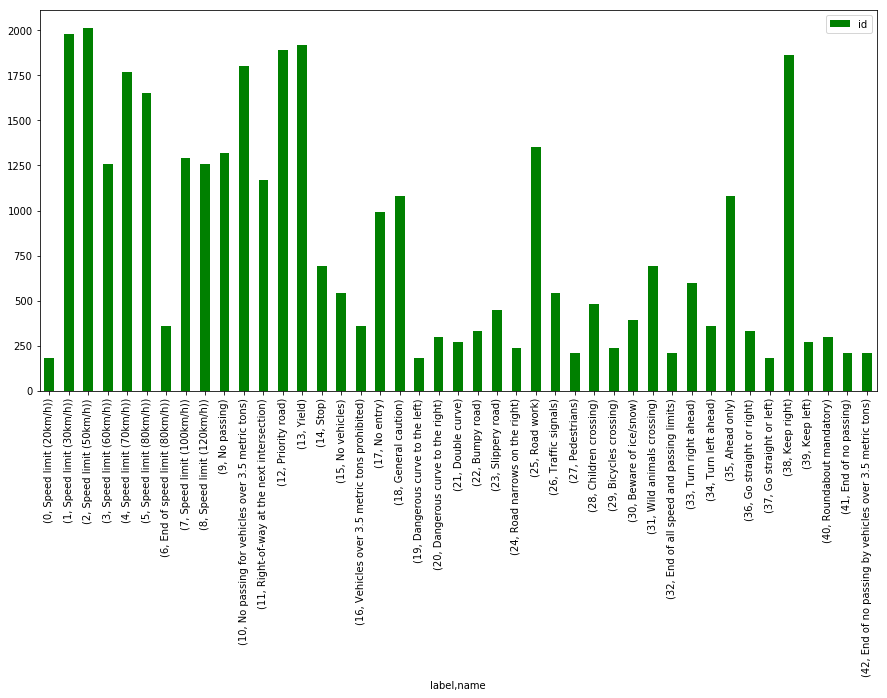

In [125]:
#### visualize the distribution of training data
x_train_label_count.plot(kind = 'bar', color = 'green', figsize = (15, 7))

### 4 Visualize the Dataset

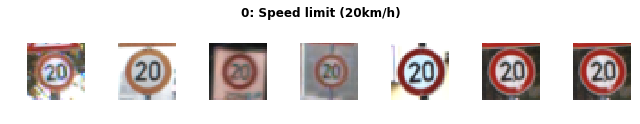

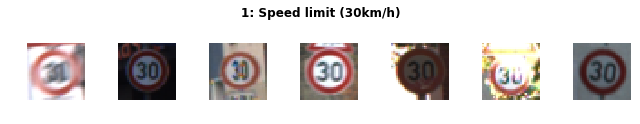

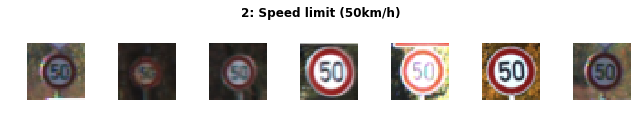

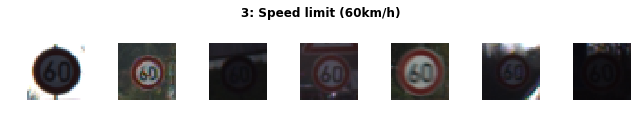

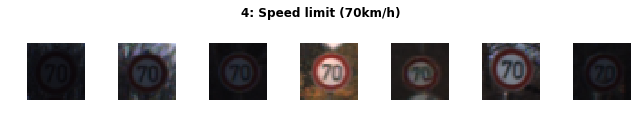

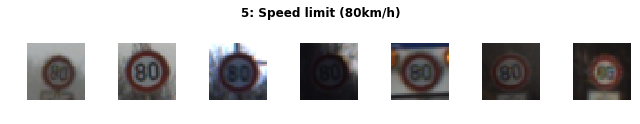

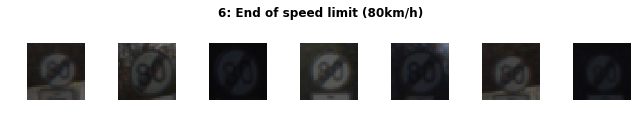

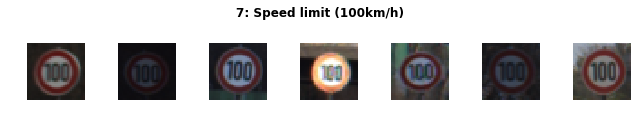

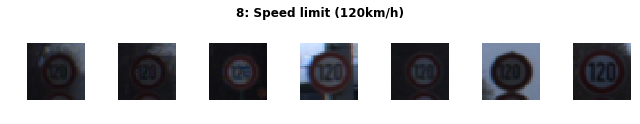

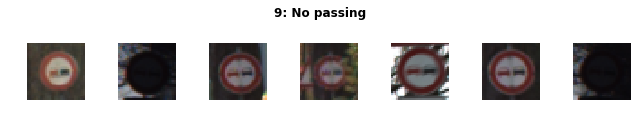

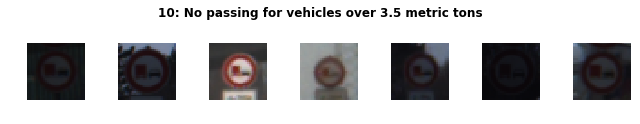

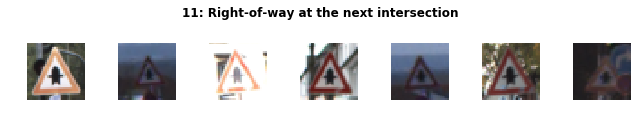

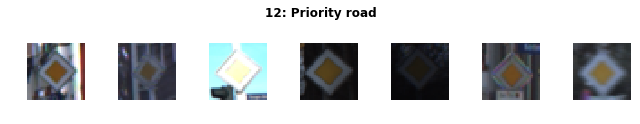

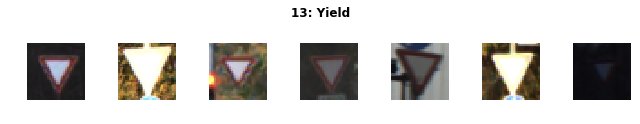

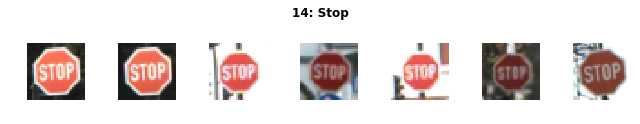

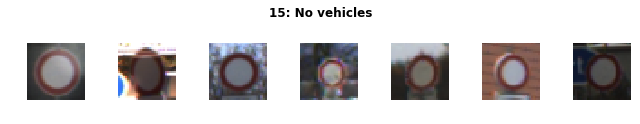

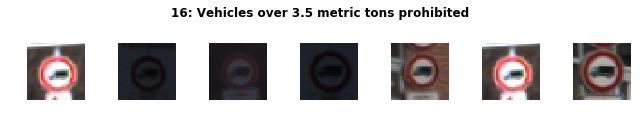

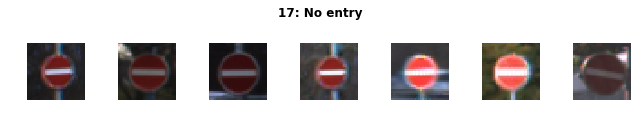

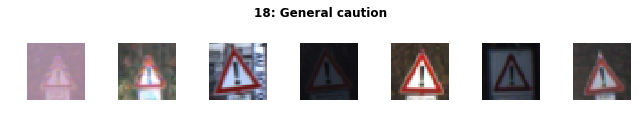

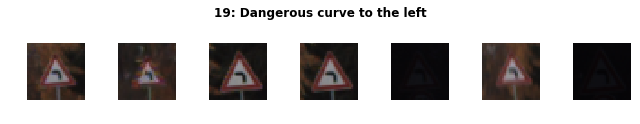

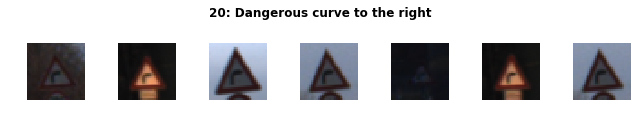

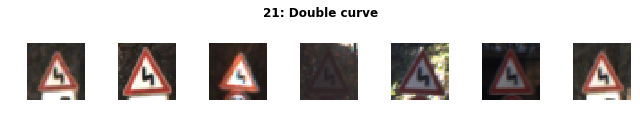

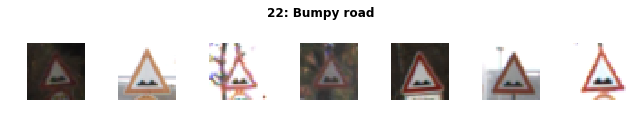

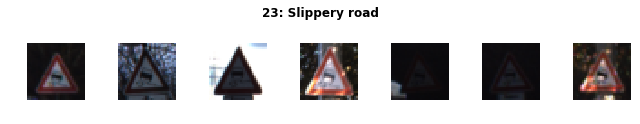

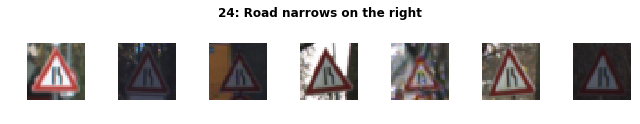

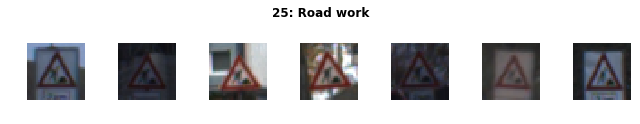

In [ ]:
#### random show 10 photos for each class
x_train_group = x_train_label_to_name.groupby(["label", "name"])
show_random_dataset_images(x_train_group, x_train)

---
## Data Preprocessing

---
## Model Construction

---
## Training

---
## Model Analysis

### Reference